In [1]:
# %%
# システムパラメータの設定
import copy
import numpy
import pandas
import scipy
import seaborn
from IPython import get_ipython

# 事前処理
seaborn.set()

# 表示桁数の設定
%precision 3
%matplotlib inline


In [2]:
## 設定
# 症例数
numA = 50
numB = 50

valStdevA = 2
valStdevB = 2

# 差
valAverageA = 0
valAverageB = 1

In [3]:
## 関数：　データ生成

def databaseMake(numA,numB,valStdevA,valStdevB,valAverageA,valAverageB):
    # 一様分布の乱数

    listA = numpy.random.normal(valAverageA,valStdevA,numA)
    listB = numpy.random.normal(valAverageB,valStdevB,numB)

    # DataFrame に格納
    ID_A = list('A') * numA
    ID_B = list('B') * numB

    dfA = pandas.DataFrame({
        'ID':ID_A,
        'data':listA    
    })

    dfB = pandas.DataFrame({
        'ID':ID_B,
        'data':listB
    })

    dfX = pandas.concat([dfA,dfB])
    
    return listA,listB,dfX


In [4]:
# データ生成と統計のテスト

listA,listB,dfX = databaseMake(numA,numB,valStdevA,valStdevB,valAverageA,valAverageB)

tValue ,pValue = scipy.stats.ttest_ind(listA,listB,equal_var=False)
round(pValue,5)

0.00094

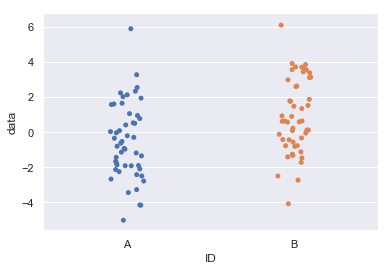

In [5]:
# 散布図テスト表示
seaborn.stripplot(x='ID',y='data',data=dfX)

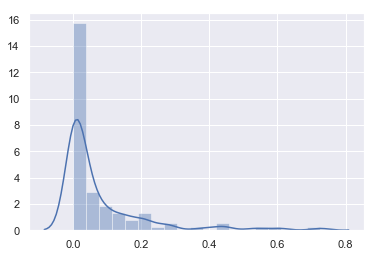

In [6]:
#繰り返し実験

repeat = 100

pValueList =list([])
for i in range(0,repeat):
    listA,listB,dfX = databaseMake(numA,numB,valStdevA,valStdevB,valAverageA,valAverageB)
    tValue ,pValue = scipy.stats.ttest_ind(listA,listB,equal_var=False)
    pValueList.extend([round(pValue,5)])

#pValueDf = pandas.DataFrame({
#    'pValue': pValueList
#})

seaborn.distplot(pValueList)


In [7]:
# 0.05以下
numOfOver005 = len([i for i in pValueList if i <= 0.05])

print('症例数は研究Aが{}、研究Bが{}'.format(numA,numB))
print('平均は研究Aが{}、研究Bが{}'.format(valAverageA,valAverageB))
print('標準偏差は研究Aが{}、研究Bが{}'.format(valStdevA,valStdevB))

print('その設定で研究を{}回繰り返したところ'.format(repeat))
print('p>=0.05 の差を認めたのは{}研究({}%)'.format(numOfOver005,(numOfOver005*100/repeat)))

症例数は研究Aが50、研究Bが50
平均は研究Aが0、研究Bが1
標準偏差は研究Aが2、研究Bが2
その設定で研究を100回繰り返したところ
p>=0.05 の差を認めたのは66研究(66.0%)
